In [111]:
## 추린 칼럼의 임의의 샘플에 대해 JSON → 그 예측모델에 넣어서 모델이 말하는 값을 도출하는 코드 fit 상태의 모델
## input : json 형태의 환자 데이터
## output : HE_DM 예측값 1, 2, 3
## 함수로 나누긴 나눴는데 저번주에 샘플 뽑을 때 실제 HE_DM값을 빼고 샘플을 뽑아서 
## 지금 샘플로는 어떤 오류 형태인지 파악을 할 수가 없네여,,
## 조금만 자고 일어나서 다시할게욥🙏🙏

In [112]:
# import
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

In [113]:
def decision(file):
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)
    
    sample = json_normalize(data)
    
    sampleID = sample.patientID ## json 데이터에 환자별로 넘버링이 되어있다고 가정
    sample = sample.drop(columns=["patientID"])
    
    pred = pipe.predict(sample)
    pred = pd.DataFrame(pred, columns=['HE_DM'])
    
    pred = pd.concat((sampleID, pred), axis =1)
    print(pred)
    
    # json파일로 내보내기
    pred = pred.to_json('pred.json', orient='records')

In [114]:
decision("sample.json")

    patientID  HE_DM
0        4361      1
1        6707      3
2        2007      1
3        4383      1
4        6155      2
5        6910      3
6        2455      2
7        2121      3
8        1718      2
9        2347      1
10        500      1
11       7691      3
12       6523      2
13       4163      1
14       2173      1
15       6917      1
16       4319      1
17       1992      1
18       4594      1
19       1441      1


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


In [115]:
#json 파일 불러오고 dataframe 형식으로

with open("./sample.json", "r", encoding="utf-8") as f:
    data = json.load(f)

sample = json_normalize(data)
sample

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,patientID,sex,age,incm5,ho_incm5,edu,occp,wt_hs,wt_itvex,wt_vt,...,HEI_VEG,HEI_PROTF,HEI_DAIRY,HEI_SFA,HEI_NA,HEI_SWEET,HEI_CHO,HEI_FAT,HEI_EN,HEI_BR
0,4361,2,47,1.0,4.0,3.0,3.0,11842.520110,11654.874280,19970.188140,...,3.432038,8.372931,0.000000,10.000000,8.921765,10.000000,1.193469,3.953236,5.000000,0
1,6707,2,41,1.0,1.0,3.0,7.0,3161.698498,2803.225916,5062.983925,...,1.238299,7.167567,0.304488,10.000000,4.974623,8.195798,1.974811,3.666145,5.000000,0
2,2007,2,63,3.2,2.0,3.0,7.0,3988.283827,6694.465450,19970.188140,...,4.183452,2.632241,0.000000,10.000000,8.824839,10.000000,0.000000,3.859851,5.000000,10
3,4383,1,39,2.0,3.0,4.0,1.0,9934.227256,14263.304560,46546.279950,...,2.691843,10.000000,0.000000,10.000000,7.855096,9.128301,2.615329,0.000000,4.523409,3
4,6155,1,76,4.0,1.0,2.0,7.0,4426.443728,3427.654565,19970.188140,...,4.959545,4.900000,0.000000,10.000000,10.000000,10.000000,1.703470,4.543740,0.000000,10
5,6910,1,73,1.0,2.0,2.0,7.0,4472.125128,3148.089113,19970.188140,...,0.501492,4.900000,0.000000,10.000000,6.355986,10.000000,0.478035,0.000000,5.000000,10
6,2455,2,54,5.0,5.0,4.0,7.0,5271.084294,4861.129616,19970.188140,...,2.200671,5.052456,0.000000,0.000000,10.000000,10.000000,0.000000,0.000000,0.000000,10
7,2121,1,69,4.0,4.0,2.0,5.0,3810.793397,3854.341211,19970.188140,...,3.216031,2.300000,0.000000,10.000000,8.277051,9.923206,0.000000,0.000000,5.000000,10
8,1718,1,68,5.0,4.0,4.0,1.0,5772.957631,3930.740910,19970.188140,...,5.000000,10.000000,0.000000,10.000000,8.953553,10.000000,1.757672,1.554970,5.000000,10
9,2347,2,36,2.0,3.0,4.0,7.0,5881.113232,10171.922400,19970.188140,...,3.535225,10.000000,9.100000,7.566476,1.121351,10.000000,0.898341,5.000000,0.000000,6


In [116]:
df = pd.read_csv("2018_SEL_FILLED.csv") ## file reading
df = df.dropna(axis=0)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4588 entries, 0 to 4587
Columns: 165 entries, patientID to HEI_BR
dtypes: float64(116), int64(49)
memory usage: 5.8 MB


In [117]:
df = df.astype({'HE_DM' : 'int'})
x = df.drop(columns=["HE_DM", "patientID"])
y = df.HE_DM

0.7864923747276689


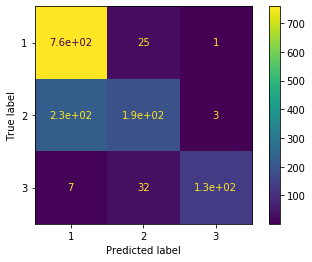

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(x_train,y_train)
pred=pipe.predict(x_test)
print(pipe.score(x_test,y_test))
plot_confusion_matrix(pipe,x_test,y_test)

In [119]:
decision("sample.json")

    patientID  HE_DM
0        4361      1
1        6707      3
2        2007      1
3        4383      1
4        6155      2
5        6910      3
6        2455      2
7        2121      3
8        1718      2
9        2347      1
10        500      1
11       7691      3
12       6523      2
13       4163      1
14       2173      1
15       6917      1
16       4319      1
17       1992      1
18       4594      1
19       1441      1


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """
